In [9]:
val,count = np.unique(genders,return_counts=True)
print(count)

[12391 11317]


In [ ]:
# gender_mapping = {
#     1: 'Female',
#     0: 'Male'
# }


0 :Male ,1:Female


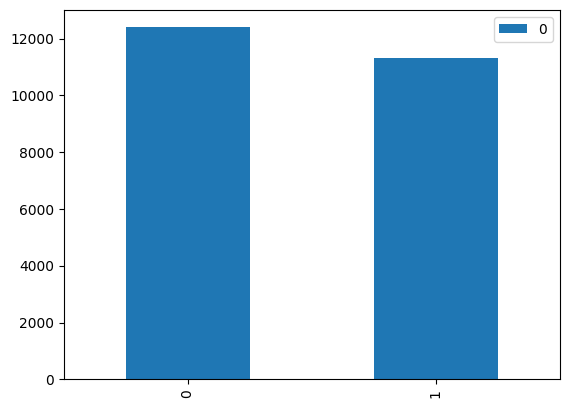

In [10]:
import pandas as pd
pd.DataFrame(count).plot(kind="bar")
print("0 :Male ,1:Female")

Processing Images:   0%|          | 0/23708 [00:00<?, ?it/s]

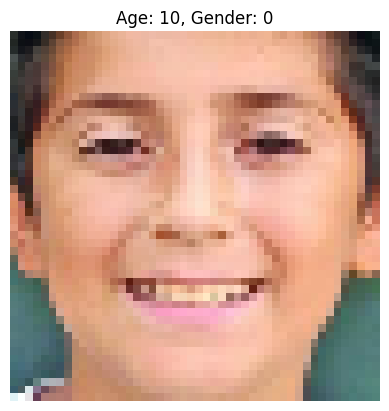

  0%|          | 0/23708 [00:00<?, ?it/s]

(23708, 48, 48, 3)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 24, 24, 64)   9472        ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 24, 24, 64)  256         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 24, 24, 64)   0           ['batch_no

                                                                  'activation_6[0][0]']           
                                                                                                  
 activation_8 (Activation)      (None, 6, 6, 128)    0           ['add_3[0][0]']                  
                                                                                                  
 conv2d_10 (Conv2D)             (None, 3, 3, 256)    295168      ['activation_8[0][0]']           
                                                                                                  
 batch_normalization_10 (BatchN  (None, 3, 3, 256)   1024        ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_9 (Activation)      (None, 3, 3, 256)    0           ['batch_normalization_10[0][0]'] 
          

 alAveragePooling2D)                                                                              
                                                                                                  
 dropout (Dropout)              (None, 512)          0           ['global_average_pooling2d[0][0]'
                                                                 ]                                
                                                                                                  
 gender_output (Dense)          (None, 1)            513         ['dropout[0][0]']                
                                                                                                  
 age_output (Dense)             (None, 1)            513         ['dropout[0][0]']                
                                                                                                  
Total params: 11,191,938
Trainable params: 11,182,338
Non-trainable params: 9,600
___________________________

Epoch 21/60
278/278 [==============================] - 16s 57ms/step - loss: 6.4802 - gender_output_loss: 0.2264 - age_output_loss: 4.7719 - gender_output_accuracy: 0.9016 - age_output_mae: 4.7802 - val_loss: 8.9192 - val_gender_output_loss: 0.3351 - val_age_output_loss: 7.1044 - val_gender_output_accuracy: 0.8453 - val_age_output_mae: 7.1044 - lr: 0.0010
Epoch 22/60
278/278 [==============================] - 16s 57ms/step - loss: 6.3589 - gender_output_loss: 0.2284 - age_output_loss: 4.6422 - gender_output_accuracy: 0.9005 - age_output_mae: 4.6480 - val_loss: 8.6446 - val_gender_output_loss: 0.3135 - val_age_output_loss: 6.7817 - val_gender_output_accuracy: 0.8605 - val_age_output_mae: 6.7817 - lr: 0.0010
Epoch 23/60
278/278 [==============================] - 16s 57ms/step - loss: 6.3187 - gender_output_loss: 0.2192 - age_output_loss: 4.5932 - gender_output_accuracy: 0.9080 - age_output_mae: 4.6019 - val_loss: 11.0500 - val_gender_output_loss: 0.2792 - val_age_output_loss: 9.2136 - va

Epoch 44/60
278/278 [==============================] - 16s 57ms/step - loss: 3.0983 - gender_output_loss: 0.0776 - age_output_loss: 1.8885 - gender_output_accuracy: 0.9740 - age_output_mae: 1.8929 - val_loss: 7.4147 - val_gender_output_loss: 0.3223 - val_age_output_loss: 5.9613 - val_gender_output_accuracy: 0.8959 - val_age_output_mae: 5.9613 - lr: 1.0000e-05
Epoch 45/60
278/278 [==============================] - 16s 57ms/step - loss: 3.0542 - gender_output_loss: 0.0730 - age_output_loss: 1.8512 - gender_output_accuracy: 0.9753 - age_output_mae: 1.8561 - val_loss: 7.4093 - val_gender_output_loss: 0.3208 - val_age_output_loss: 5.9595 - val_gender_output_accuracy: 0.8966 - val_age_output_mae: 5.9595 - lr: 1.0000e-05
Epoch 46/60
278/278 [==============================] - 16s 56ms/step - loss: 3.0428 - gender_output_loss: 0.0750 - age_output_loss: 1.8398 - gender_output_accuracy: 0.9751 - age_output_mae: 1.8447 - val_loss: 7.4108 - val_gender_output_loss: 0.3244 - val_age_output_loss: 5.95

In [2]:
# Importing required modules
import tensorflow as tf
from tensorflow.keras.utils import load_img
from keras.models import Sequential, Model
from tensorflow.keras.regularizers import l2
from keras.layers import Activation, Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input, BatchNormalization, Add, GlobalAveragePooling2D
import numpy as np
import random
import matplotlib.pyplot as plt
import os 
import seaborn as sns
import warnings 
from tqdm.notebook import tqdm 
import cv2

%matplotlib inline

# Directory containing images
fdir = r"C:\prabhakar\projects\pythonProject\suspicious_activity\data\UTKFace"

# List all files in the directory
img = os.listdir(fdir)

# Lists to store data
ages = []
genders = []
images = []

# Process each image with tqdm progress bar
for i in tqdm(img, desc='Processing Images'):
    
    # Extracting age and gender from filename
    age_gender = i.split('_')
    age = int(age_gender[0])
    gender = int(age_gender[1])
    
    # Appending age and gender to respective lists
    ages.append(age)
    genders.append(gender)
    
    # Constructing path and read image
    path = os.path.join(fdir, i)
    image = cv2.imread(path)
    
    # Converting image to RGB and resize
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (48, 48))
    
    # Append processed image to images list
    images.append(image)

# Converting images, ages, genders list to numpy array for easier manipulation
images = np.array(images)
ages = np.array(ages)
genders = np.array(genders)

# Display the first image
plt.imshow(images[101])
plt.axis('off')  # Turn off axis labels
plt.title(f"Age: {ages[101]}, Gender: {genders[101]}")
plt.show()

age_gen = []

# Use tqdm to create a progress bar
for i in tqdm(range(len(ages))):  
    label = []
    label.append(ages[i])
    label.append(genders[i])
    age_gen.append(label)

res_images = images / 255.0  # Normalize images
age_gen_ar = np.array(age_gen)

print(res_images.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(res_images, age_gen_ar, test_size=0.25)

# Handling imbalanced data
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', classes=np.unique(Y_train[:, 1]), y=Y_train[:, 1])
class_weights = dict(enumerate(class_weights))

# Calculate sample weights
sample_weights = np.array([class_weights[int(gender)] for gender in Y_train[:, 1]])

Y_train_2 = [Y_train[:, 1], Y_train[:, 0]]
Y_test_2 = [Y_test[:, 1], Y_test[:, 0]]

def res_block(input_tensor, filters, strides=(1, 1)):
    x = Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same', kernel_regularizer=l2(0.001))(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)

    if strides != (1, 1):
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='same', kernel_regularizer=l2(0.001))(input_tensor)
        shortcut = BatchNormalization()(shortcut)
    else:
        shortcut = input_tensor

    x = Add()([x, shortcut])
    x = Activation('relu')(x)
    return x

def create_resnet(input_shape):
    inputs = Input(shape=input_shape)

    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', kernel_regularizer=l2(0.001))(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = res_block(x, 64)
    x = res_block(x, 64)

    x = res_block(x, 128, strides=(2, 2))
    x = res_block(x, 128)

    x = res_block(x, 256, strides=(2, 2))
    x = res_block(x, 256)

    x = res_block(x, 512, strides=(2, 2))
    x = res_block(x, 512)

    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)  # Adding dropout for regularization

    gender_output = Dense(1, activation='sigmoid', name='gender_output')(x)
    age_output = Dense(1, activation='linear', name='age_output')(x)

    model = Model(inputs=inputs, outputs=[gender_output, age_output])
    model.compile(optimizer='adam', 
                  loss={'gender_output': 'binary_crossentropy', 'age_output': 'mae'},
                  metrics={'gender_output': 'accuracy', 'age_output': 'mae'})
    return model

model = create_resnet((48, 48, 3))
model.summary()

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.00001)

# Early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Model checkpointing to save the best model
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

callback_list = [reduce_lr, early_stop, checkpoint]

history = model.fit(X_train, Y_train_2, 
                    batch_size=64, 
                    validation_data=(X_test, Y_test_2), 
                    epochs=60, 
                    callbacks=callback_list,
                    sample_weight=sample_weights)  # Using sample weights instead of class weights


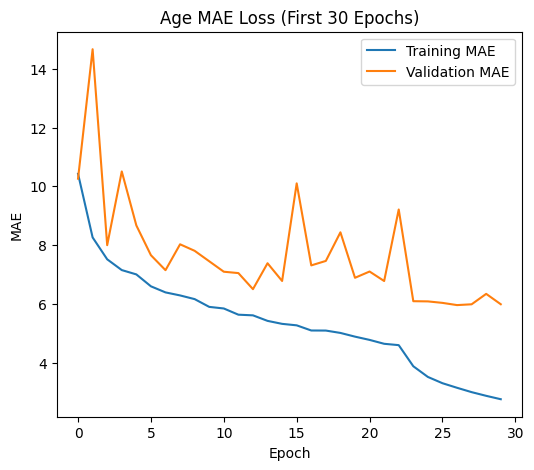

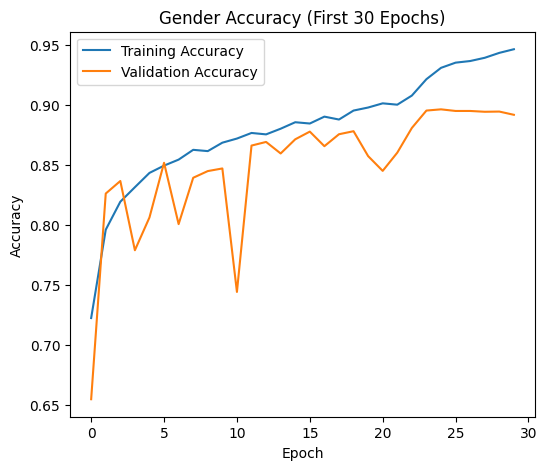

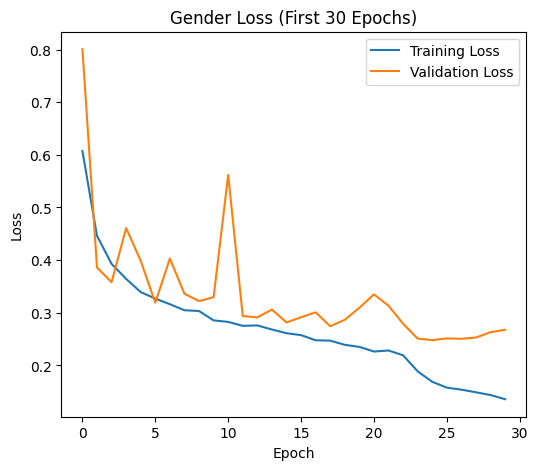

In [7]:
import matplotlib.pyplot as plt

# Slice the history data for the first 30 epochs
epochs_to_show = 30

# Plot MAE Loss
plt.figure(figsize=(6, 5))
plt.plot(history.history['age_output_mae'][:epochs_to_show], label='Training MAE')
plt.plot(history.history['val_age_output_mae'][:epochs_to_show], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Age MAE Loss (First 30 Epochs)')
plt.legend()
plt.show()

# Plot Gender Accuracy
plt.figure(figsize=(6, 5))
plt.plot(history.history['gender_output_accuracy'][:epochs_to_show], label='Training Accuracy')
plt.plot(history.history['val_gender_output_accuracy'][:epochs_to_show], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Gender Accuracy (First 30 Epochs)')
plt.legend()
plt.show()

# Plot Gender Loss
plt.figure(figsize=(6, 5))
plt.plot(history.history['gender_output_loss'][:epochs_to_show], label='Training Loss')
plt.plot(history.history['val_gender_output_loss'][:epochs_to_show], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Gender Loss (First 30 Epochs)')
plt.legend()
plt.show()


In [12]:
# Save the model after training (assuming 'model' is your trained model)
model_save_path = r'C:\prabhakar\projects\age_gender_model.h5' # Raw string for Windows paths
model.save(model_save_path) 


In [1]:
import tensorflow as tf
import gc

def clear_gpu_memory():
    """
    This function attempts to clear GPU memory used by TensorFlow.
    """

    try:
        # Clear the current TensorFlow session
        tf.keras.backend.clear_session()

        # Force garbage collection
        gc.collect()

        # Clear memory used by GPU
        if tf.config.list_physical_devices('GPU'):
            # This will reset the peak memory stats but won't necessarily free all memory
            tf.config.experimental.reset_memory_stats('GPU:0') 
            print("GPU memory stats reset.")
        else:
            print("No GPU found.")

    except Exception as e:
        print(f"An error occurred while clearing GPU memory: {e}")

# Clear GPU memory before training
clear_gpu_memory()

GPU memory stats reset.


1/1 [==============================] - 1s 911ms/step


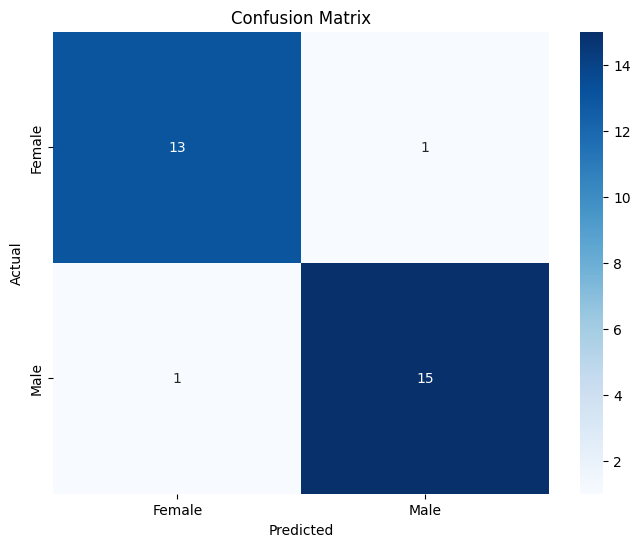

Classification Report:
               precision    recall  f1-score   support

      Female       0.93      0.93      0.93        14
        Male       0.94      0.94      0.94        16

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Extract the first 30 data points from the test set
X_test_sample = X_test[:30]
Y_test_genders_sample = Y_test_2[0][:30]  # Extract the gender labels for the first 30 data points

# Predict the gender for these data points
gender_predictions = model.predict(X_test_sample)[0]  # Getting the gender predictions

# Convert predictions to binary labels
gender_predictions_binary = (gender_predictions > 0.5).astype(int)

# Create a confusion matrix
conf_matrix = confusion_matrix(Y_test_genders_sample, gender_predictions_binary)

# Create a classification report
class_report = classification_report(Y_test_genders_sample, gender_predictions_binary, target_names=['Female', 'Male'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("Classification Report:\n", class_report)


**Precision:**

Female: 93% of the instances predicted as "Female" were actually female.
Male: 94% of the instances predicted as "Male" were actually male.
This shows the model is highly accurate in identifying the correct gender when it makes a prediction.

**Recall (Sensitivity):**

Female: 93% of the actual "Female" instances were correctly predicted.
Male: 94% of the actual "Male" instances were correctly predicted.
This means the model is very good at finding and classifying most of the individuals in each gender class.

**F1-Score:**

Female: 93% - The harmonic mean of precision and recall for the female class, showing a balance between the two metrics.
Male: 94% - The same for the male class, also demonstrating a good balance.
The F1-score is a good overall indicator of a model's performance, especially when you want to balance precision and recall.

**Support:**

Female: 14 - This is the number of female instances in the test set.
Male: 16 - This is the number of male instances in the test set.
Accuracy:

Overall, the model correctly predicted the gender for 93% of the instances in the test set.

In [8]:
!nvidia-smi -h


NVIDIA System Management Interface -- v560.70

NVSMI provides monitoring information for Tesla and select Quadro devices.
The data is presented in either a plain text or an XML format, via stdout or a file.
NVSMI also provides several management operations for changing the device state.

Note that the functionality of NVSMI is exposed through the NVML C-based
library. See the NVIDIA developer website for more information about NVML.
Python wrappers to NVML are also available.  The output of NVSMI is
not guaranteed to be backwards compatible; NVML and the bindings are backwards
compatible.

http://developer.nvidia.com/nvidia-management-library-nvml/
http://pypi.python.org/pypi/nvidia-ml-py/
Supported products:
- Full Support
    - All Tesla products, starting with the Kepler architecture
    - All Quadro products, starting with the Kepler architecture
    - All GRID products, starting with the Kepler architecture
    - GeForce Titan products, starting with the Kepler architecture
- Limi